# Information Visualization

In [1]:
import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt

In [17]:
!pip install -U altair==4.2.0

  Using cached altair-4.2.0-py3-none-any.whl (812 kB)
  Attempting uninstall: altair
    Found existing installation: altair 4.2.2
    Uninstalling altair-4.2.2:
      Successfully uninstalled altair-4.2.2


In [18]:
df=pd.read_csv('cleaned data.csv',parse_dates=["Date"],dayfirst=True)
df.head()

Unnamed: 0  Store       Date  Weekly_Sales  Holiday_Flag  Temperature  \
0           0      1 2010-02-05    1643690.90             0        42.31   
1           1      1 2010-02-12    1641957.44             1        38.51   
2           2      1 2010-02-19    1611968.17             0        39.93   
3           3      1 2010-02-26    1409727.59             0        46.63   
4           4      1 2010-03-05    1554806.68             0        46.50   

   Fuel_Price         CPI  Unemployment  Year  Month  Quarter     Holidays  
0       2.572  211.096358         8.106  2010      2        1  Normal Days  
1       2.548  211.242170         8.106  2010      2        1   Super Bowl  
2       2.514  211.289143         8.106  2010      2        1  Normal Days  
3       2.561  211.319643         8.106  2010      2        1  Normal Days  
4       2.625  211.350143         8.106  2010      3        1  Normal Days

In [19]:
df.shape

(6435, 13)

In [20]:
df.isnull().sum()

Unnamed: 0      0
Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
Year            0
Month           0
Quarter         0
Holidays        0
dtype: int64

In [21]:
df.describe()

Unnamed: 0        Store  Weekly_Sales  Holiday_Flag  Temperature  \
count  6435.000000  6435.000000  6.435000e+03   6435.000000  6435.000000   
mean   3217.000000    23.000000  1.046965e+06      0.069930    60.663782   
std    1857.768823    12.988182  5.643666e+05      0.255049    18.444933   
min       0.000000     1.000000  2.099862e+05      0.000000    -2.060000   
25%    1608.500000    12.000000  5.533501e+05      0.000000    47.460000   
50%    3217.000000    23.000000  9.607460e+05      0.000000    62.670000   
75%    4825.500000    34.000000  1.420159e+06      0.000000    74.940000   
max    6434.000000    45.000000  3.818686e+06      1.000000   100.140000   

        Fuel_Price          CPI  Unemployment         Year        Month  \
count  6435.000000  6435.000000   6435.000000  6435.000000  6435.000000   
mean      3.358607   171.578394      7.999151  2010.965035     6.447552   
std       0.459020    39.356712      1.875885     0.797019     3.238308   
min       2.472000   126.064000      3.879000  2010.000000     1.000000   
25%       2.933000   131.735000      6.891000  2010.000000     4.000000   
50%       3.445000   182.616521      7.874000  2011.000000     6.000000   
75%       3.735000   212.743293      8.622000  2012.000000     9.000000   
max       4.468000   227.232807     14.313000  2012.000000    12.000000   

           Quarter  
count  6435.000000  
mean      2.482517  
std       1.070036  
min       1.000000  
25%       2.000000  
50%       2.000000  
75%       3.000000  
max       4.000000

In [22]:
df.Store.value_counts()

1     143
24    143
26    143
27    143
28    143
29    143
30    143
31    143
32    143
33    143
34    143
35    143
36    143
37    143
38    143
39    143
40    143
41    143
42    143
43    143
44    143
25    143
23    143
2     143
22    143
3     143
4     143
5     143
6     143
7     143
8     143
9     143
10    143
11    143
12    143
13    143
14    143
15    143
16    143
17    143
18    143
19    143
20    143
21    143
45    143
Name: Store, dtype: int64

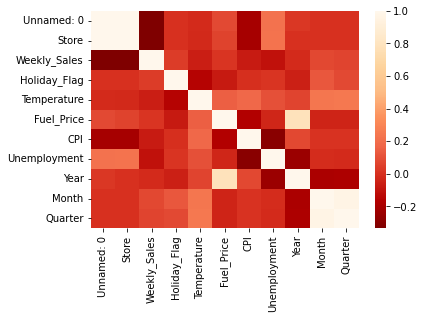

<Figure size 720x720 with 0 Axes>

In [23]:
import seaborn as sns
sns.heatmap(df.corr(),cmap="OrRd_r")
plt.figure(figsize=(10,10))
plt.show()

In [24]:
stores=df.Store.unique().tolist()
stores.sort()

In [25]:
alt.data_transformers.disable_max_rows()
selected=alt.selection_interval(encodings=['x']
)

selected2=alt.selection_interval(encodings=['x']
)

xbase=alt.Chart(df).encode(
    alt.X("month(Date):T"),
    alt.Y("average(Weekly_Sales)",title="Average Sales"),
        color=alt.Color("Year:N",legend=None)
)

x=alt.layer(xbase.mark_line(),
            xbase.mark_circle().encode(
    tooltip=[alt.Tooltip("average(Weekly_Sales)"),
             alt.Tooltip("average(CPI)"),
             alt.Tooltip("average(Unemployment)"),
             alt.Tooltip("average(Fuel_Price)")]
             )
    ).add_selection(selected2).transform_filter(selected).transform_filter(selected2).interactive()

ybase=alt.Chart(df).encode(
    alt.X("Store:N",title="Store ID"),
    alt.Y("sum(Weekly_Sales)",title=" Total Sales"),
    opacity=alt.condition(selected,alt.value(0.8),alt.value(0.18))
)
y=ybase.mark_bar(width=20).add_selection(selected).encode(
    tooltip=[alt.Tooltip("sum(Weekly_Sales)",title="Total Sales"),alt.Tooltip("Store")]
).properties(title="Total sales by the Given Store").interactive()

In [26]:

h=alt.Chart(df).mark_bar().add_selection(selected).encode(
    alt.X("Year:N"),
    alt.Y("sum(Weekly_Sales)",title="Total Sales"),
    alt.Color("Year:N",legend=None),
    alt.Column("Holidays:N",title="total Holidays Sales for the selection"),
    tooltip=alt.Tooltip("sum(Weekly_Sales)"),
).transform_filter({'not':alt.FieldEqualPredicate(field="Holidays",equal="Normal Days")}).transform_filter(selected)

In [27]:
# cpi_temp=alt.Chart(df).mark_circle().encode(
#     alt.X("Fuel_Price:Q"),
#     alt.Y("CPI:Q")
# )
# cpi_temp.transform_filter()

In [28]:
single=alt.selection_multi(fields=["Year"],name="Year")
single2=alt.selection_multi(fields=["Holidays"],name="Holidays")
selection_year=alt.Chart(df).mark_circle(size=200).encode(
    alt.Y("Year:N",title="Select years"),
    color=alt.condition(single,alt.Color("Year:N",legend=None),alt.value("lightgrey"))
 ).add_selection(single)
selection_year

alt.Chart(...)

In [29]:
selection_holiday=alt.Chart(df).mark_circle(size=200).encode(
    alt.Y("Holidays:N",title="Select Holidays"),
    color=alt.condition(single2,alt.Color("Holidays:N",legend=None),alt.value("lightgrey"))
 ).add_selection(single2).transform_filter({'not':alt.FieldEqualPredicate(field="Holidays",equal="Normal Days")})
selection_holiday

alt.Chart(...)

In [14]:
(((x.properties(width=480,title="Average Sales of the Selection")|h.properties(width=90))&y.properties(width=1000,height=150)).transform_filter(single)).transform_filter(single2)|(selection_year&selection_holiday)

alt.HConcatChart(...)